## Import the needed package

In [1]:
# package to get the custom modules
import sys
# get the custom modules
sys.path.insert(0, './../../')
# package for handling files
import os
# import the needed path
from utilities import path_split_origin, path_split_augment, path_model
# import the needed custom function
from utilities import load_img_mask, create_dataset, custom_load_model, predict_model, split_disc_cup_mask, split_eyeside
# package to handle random numbers
from random import randint

d:\Programming\Python\Env_storage\research_prof_anin\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
d:\Programming\Python\Env_storage\research_prof_anin\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter 

## Global Variable

In [2]:
# paths where dataset is stored
path_test_ori = os.path.join(path_split_origin, 'test')
path_test_aug = os.path.join(path_split_augment, 'test')

## Get Dataset

In [3]:
# get the image and mask files
test_ori_img, test_ori_mask = load_img_mask(path_test_ori)
test_aug_img, test_aug_mask = load_img_mask(path_test_aug)
# create the tensorflow dataset
testset_ori = create_dataset(test_ori_img, test_ori_mask, return_path=True)
testset_aug = create_dataset(test_aug_img, test_aug_mask, return_path=True)

## Create Predicted Result

In [4]:
# model unet
pred_unet_mask_ori, unet_model_ori, path_unet_ori = predict_model(testset_ori, path_model, "unet_model_ori", path_img=True)
print("Unet model ori done")
# pred_unet_mask_aug, unet_model_aug, path_unet_aug = predict_model(testset_aug, path_model, "unet_model_aug", path_img=True)
# print("Unet model aug done")
# # model mobilenet
# pred_mnet_mask_ori, mnet_model_ori, path_mnet_ori = predict_model(testset_ori, path_model, "mnet_model_ori", path_img=True)
# print("Mnet model ori done")
# pred_mnet_mask_aug, mnet_model_aug, path_mnet_aug = predict_model(testset_aug, path_model, "mnet_model_aug", path_img=True)
# print("Mnet model aug done")
# # model efficientnet
# pred_efnet_mask_ori, efnet_model_ori, path_efnet_ori = predict_model(testset_ori, path_model, "efnet_model_ori", path_img=True)
# print("Efnet model ori done")
# pred_efnet_mask_aug, efnet_model_aug, path_efnet_aug = predict_model(testset_aug, path_model, "efnet_model_aug", path_img=True)
# print("Efnet model aug done")

1/1 [==============================] - 1s 692ms/step
Unet model ori done


## Split The Mask Image

In [5]:
# set the threshold value
treshold = .5

In [6]:
# show the predicted disc and cup area for the unet model in the original dataset
print("Unet model ori predicted mask")
unet_cup_mask_ori, unet_disc_mask_ori, unet_bcup_mask_ori, unet_bdisc_mask_ori = split_disc_cup_mask(pred_unet_mask_ori,
                                                                                                            treshold,
                                                                                                            visualize=False)
# # show the predicted disc and cup area for the unet model in the augmented dataset
# print("Unet model aug predicted mask")
# unet_cup_mask_aug, unet_disc_mask_aug, unet_bcup_mask_aug, unet_bdisc_mask_aug = split_disc_cup_mask(pred_unet_mask_aug,
#                                                                                                             treshold,
#                                                                                                             visualize=False)

# # show the predicted disc and cup area for the efficientnet model in the original dataset
# print("Mnet model ori predicted mask")
# mnet_cup_mask_ori, mnet_disc_mask_ori, mnet_bcup_mask_ori, mnet_bdisc_mask_ori = split_disc_cup_mask(pred_mnet_mask_ori,
#                                                                                                             treshold,
#                                                                                                             visualize=False)
# # show the predicted disc and cup area for the efficientnet model in the augmented dataset
# print("Mnet model aug predicted mask")
# mnet_cup_mask_aug, mnet_disc_mask_aug, mnet_bcup_mask_aug, mnet_bdisc_mask_aug = split_disc_cup_mask(pred_mnet_mask_aug,
#                                                                                                             treshold,
#                                                                                                             visualize=False)

# # show the predicted disc and cup area for the efficientnet model in the original dataset
# print("Efnet model ori predicted mask")
# efnet_cup_mask_ori, efnet_disc_mask_ori, efnet_bcup_mask_ori, efnet_bdisc_mask_ori = split_disc_cup_mask(pred_efnet_mask_ori,
#                                                                                                                 treshold,
#                                                                                                                 visualize=False)
# # show the predicted disc and cup area for the efficientnet model in the augmented dataset
# print("Efnet model aug predicted mask")
# efnet_cup_mask_aug, efnet_disc_mask_aug, efnet_bcup_mask_aug, efnet_bdisc_mask_aug = split_disc_cup_mask(pred_efnet_mask_aug,
#                                                                                                                 treshold,
#                                                                                                                 visualize=False)

Unet model ori predicted mask


## Classify Eye Side

In [7]:
images, _, img_paths = next(iter(testset_ori))

result = split_eyeside(binary_cup_mask=unet_bcup_mask_ori,
                        binary_disc_mask=unet_bdisc_mask_ori,
                        dataset_img=images, img_paths=img_paths)

In [8]:
result

[{'file_name': 'fff_1_87487_r_3.jpg',
  'real_eye_side': 'right',
  'pred_eye_side': 'left',
  'left_intensity': 80.89804077148438,
  'right_intensity': 91.67058563232422,
  'cup_bbox': (63, 55, 78, 69),
  'disc_bbox': (58, 51, 82, 72)},
 {'file_name': 'fff_1_731_r_d.jpg',
  'real_eye_side': 'right',
  'pred_eye_side': 'left',
  'left_intensity': 27.23529624938965,
  'right_intensity': 61.188232421875,
  'cup_bbox': (48, 52, 59, 62),
  'disc_bbox': (43, 48, 64, 67)},
 {'file_name': 'fff_0_121076_r_1.jpg',
  'real_eye_side': 'right',
  'pred_eye_side': 'left',
  'left_intensity': 34.0,
  'right_intensity': 39.203922271728516,
  'cup_bbox': (55, 47, 70, 59),
  'disc_bbox': (51, 44, 74, 63)},
 {'file_name': 'fff_1_5438_r_2.jpg',
  'real_eye_side': 'right',
  'pred_eye_side': 'left',
  'left_intensity': 52.80000305175781,
  'right_intensity': 56.55294418334961,
  'cup_bbox': (69, 78, 82, 96),
  'disc_bbox': (33, 73, 57, 94)},
 {'file_name': 'fff_0_115058_l_1.jpg',
  'real_eye_side': 'left'

## Experiment

In [9]:
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
import tensorflow as tf

In [10]:
def ev_cdr(model:tf.keras.Model, img_path:str, mask_path:str, threshold:float=.5, img_size:int=128):
    """calculate the CDR value of the given image with the given model

    Args:
        model (tf.keras.Model): the model that will be used
        img_path (str): the path of the test image
        mask_path (str): the path of the mask image
        threshold (float, optional): threshold define active pixel to make binary image. Defaults to .5.
        img_size (int, optional): the size of image in rasio of 1:1. Defaults to 128.

    Returns:
        dict: the CDR value
    """
    # preprocess and get the image
    img = tf.io.read_file(img_path)                                         # read the image
    img = tf.image.decode_jpeg(img, channels=3)                             # read the jpg file to readable type
    img = tf.image.resize(img, (img_size, img_size), method='nearest')      # change the image size
    img = tf.cast(img, tf.float32) / 255.                                   # normalize the image
    img = tf.expand_dims(img, axis=0)                                       # change the shape of the image to simulate batch dataset

    # predict the image
    pred_mask = model.predict(img, verbose=0)

    # split the mask image to a binary mask image
    cup_mask = tf.where(pred_mask[..., 1] > threshold, 1, 0)
    disc_mask = tf.where(pred_mask[..., 2] > threshold, 1, 0)

    # create a bounding box for each binary image (will get the coordinate)
    cup_bbox = regionprops(label(cup_mask.numpy())[0])[0].bbox
    disc_bbox = regionprops(label(disc_mask.numpy())[0])[0].bbox

    # calculate the size of bounding box
    cup_width = cup_bbox[3] - cup_bbox[1]
    cup_height = cup_bbox[2] - cup_bbox[0]
    disc_width = disc_bbox[3] - disc_bbox[1]
    disc_height = disc_bbox[2] - disc_bbox[0]

    # crop the disc area
    disc_crop = img[0, disc_bbox[0]:disc_bbox[2], disc_bbox[1]:disc_bbox[3], :]

    # split the disc area
    h, w, c = disc_crop.shape
    mid = w // 2
    left = disc_crop[:, :mid, :]
    right = disc_crop[:, mid:, :]

    # extract green channel
    left_green = left[..., 1]
    right_green = right[..., 1]

    # count the pixels intensity
    left_intensity = tf.reduce_sum(left_green).numpy()
    right_intensity = tf.reduce_sum(right_green).numpy()

    # result of eye side
    if left_intensity > right_intensity:
        eye_side = "right"
    elif left_intensity < right_intensity:
        eye_side = "left"
    else:
        eye_side = "uncertain"

    # visualize the result
    plt.figure(figsize=(10, 10))

    # show the original mask of the given fundus image
    plt.subplot(3,2, 1)
    plt.imshow(plt.imread(mask_path), cmap="gray")                      # show image
    plt.title("Original Mask")
    plt.axis("off")

    # show the predicted mask with bounding box on it
    plt.subplot(3,2, 2)
    plt.imshow(tf.argmax(pred_mask, axis=-1)[0], cmap="gray")           # show image
    plt.gca().add_patch(plt.Rectangle((cup_bbox[1], cup_bbox[0]),       # show bounding box of cup
                                    cup_width, cup_height,
                                    edgecolor='b', facecolor='none'))
    plt.gca().add_patch(plt.Rectangle((disc_bbox[1], disc_bbox[0]),     # show bounding box of disc
                                    disc_width, disc_height,
                                    edgecolor='c', facecolor='none'))
    plt.title("Predicted Mask")
    plt.axis("off")

    # show the original image with bouding box on it
    plt.subplot(3,2, 3)
    plt.imshow(img[0])
    plt.gca().add_patch(plt.Rectangle((cup_bbox[1], cup_bbox[0]),
                                        cup_width, cup_height,
                                        edgecolor='b', facecolor='none'))
    plt.gca().add_patch(plt.Rectangle((disc_bbox[1], disc_bbox[0]),
                                        disc_width, disc_height,
                                        edgecolor='c', facecolor='none'))
    plt.title("Original Image")
    plt.axis("off")
    
    plt.subplot(3,2, 4)
    plt.imshow(disc_crop)
    plt.axvline(x=mid, color='g', linestyle='--', linewidth=2)
    plt.title(f"Cropped Disc Area ({eye_side} eye)")
    plt.axis("off")

    plt.subplot(3,2, 5)
    plt.imshow(left_green, cmap="gray")
    plt.title(f"Left Green Channel: {left_intensity:.2f}")
    plt.axis("off")

    plt.subplot(3,2, 6)
    plt.imshow(right_green, cmap="gray")
    plt.title(f"Right Green Channel: {right_intensity:.2f}")
    plt.axis("off")

    plt.show()

    # # calculate the CDR value
    # return {"origin img": img}

In [23]:
idx = randint(0, len(test_ori_img)-1)
test_ori_img[idx].split('\\')[-1]

'fff_0_115058_l_1.jpg'

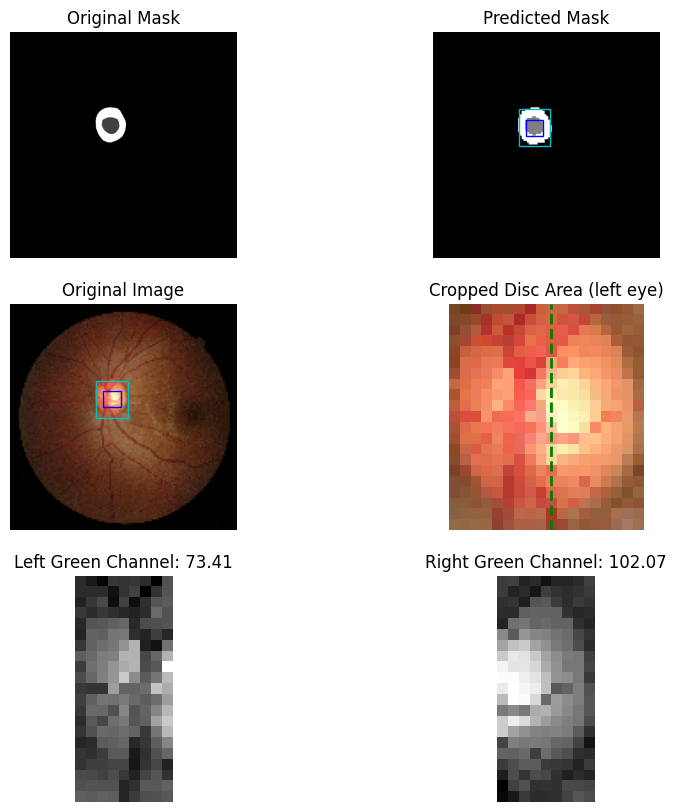

In [24]:
ev_cdr(
    model=custom_load_model(os.path.join(path_model, f"unet_model_ori.h5")),
    img_path=test_ori_img[idx],
    mask_path=test_ori_mask[idx],
    threshold=.76
)